In [ ]:
# Tensorflow Keras를 이용해서 Simple Linear Regression을
# 구현해 보아요!
# 독립변수가 1개인 선형회귀모델을 지칭!

# library부터 import작업을 해야 해요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# Raw Data Loading

original = pd.read_csv('/content/drive/MyDrive/[빅데이터 과정 공유폴더]/data/ozone/ozone.csv')
# display(df)  # 153 rows × 6 columns
# 온도에 따른 오존량 예측 모델을 만들어 볼꺼예요!

df = original[['Temp', 'Ozone']]
# display(df)

# 그런데... 이 데이터안에.. 약간 문제가 있죠.
# 데이터안에 NaN이 존재해요!
# df.info()
# 우리는 NaN을 일단 삭제처리할꺼예요!
drop_df = df.dropna(how='any')
# display(df)  # 116 rows × 2 columns

from scipy import stats
# 결측치를 처리했으니 이번에는 이상치를 처리해 보아요!
# zscore방식을 이용해서 이상치를 처리하세요!
zscore_threshold = 1.8
outlier = drop_df['Ozone'][np.abs(stats.zscore(drop_df['Ozone'])) > zscore_threshold]

outlier_df = drop_df.loc[np.isin(drop_df['Ozone'],outlier, invert=True)]
# 109 rows × 2 columns

# 3. 이상치 처리를 다 한후 정규화(Normalization)를 진행
#    정규화는 MinMaxScaling과 Standardization을 일반적으로 이용해요!
#    MinMaxScaling은 최대값과 최소값을 이용해서 scaling
#    만약 이상치가 존재하면 이 방식은 문제가 있어요!
#    그래서 MinMaxScaling을 하려면 반드시 이상치 처리부터 진행해야 해요!

#    그런데 데이터를 다루다보면 이상한 값이긴 한데..(수치적으로)
#    tukey's fences나 zscore를 이용하면 분명히 이상치라고 나오는데..실제로는
#    이상치가 아닌 경우가 존재해요!
#    이런경우에는 이 이상치를 제거하면 안되요..실제로 나올 수 있는 데이터기 때문에..
#    이런경우 평균과 표준편차를 이용한 Standardization방식을 이용해서 정규화
#    하면 되요! 이 방식은 상대적으로 이상치에 관대해요!

# 우리는 MinMaxScaling을 사용할꺼예요!
# display(df)

# 계산식을 이용해서 MinMaxScaling을 하려면 구현이 복잡해요!
# 그래서 이 작업역시 library를 이용해서 처리하면 좋아요!
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler는 변환시켜주는 객체예요!
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()
# scaler에게 최대값과 최소값을 알려줘요!
scaler_x.fit(outlier_df['Temp'].values.reshape(-1,1))
scaler_t.fit(outlier_df['Ozone'].values.reshape(-1,1))

# Training Data Set을 만들어요!
x_data = scaler_x.transform(outlier_df['Temp'].values.reshape(-1,1))
t_data = scaler_t.transform(outlier_df['Ozone'].values.reshape(-1,1))

# x_data = df['Temp'].values.reshape(-1,1)
# t_data = df['Ozone'].values.reshape(-1,1)

In [ ]:
# Model 구현

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                      activation='linear')
keras_model.add(output_layer)

keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='mse')

keras_model.fit(x_data,
                t_data,
                epochs=2000)

In [ ]:
# 이 모델이 잘 만들어진 모델인지 검증해야 해요!
# 검증방법이 있는데...지금은 검증방법을 이용하지 않고 sklearn과 비교해서
# 우리 모델을 검증할꺼예요!

# 검증이 끝나면 Prediction(예측)을 수행하면 되요!
# 우리가 데이터를 정규화해서 사용했어요....당연히 학습된 데이터는
# 0과 1사이의 데이터를 이용하는거구요..실데이터를 이용하지 않았어요!
# 그런데 예측할때 실데이터를 넣게되면 당연히 예측이 잘 되지 않겠죠.

my_data = np.array([[62]])
my_data_norm = scaler_x.transform(my_data)

# 이렇게 예측할때도 정규화된 데이터를 넣어서 예측을 수행해야 해요!
result = keras_model.predict(my_data_norm)

# 그러면 결과는 당연히 실제 Ozone값이 나오는게 아니라..정규화된 Ozone값이
# 출력되게 되요!
real_result = scaler_t.inverse_transform(result)

print(real_result)   # [[4.317596]]


1/1 [==============================] - 0s 61ms/step
[[4.317596]]


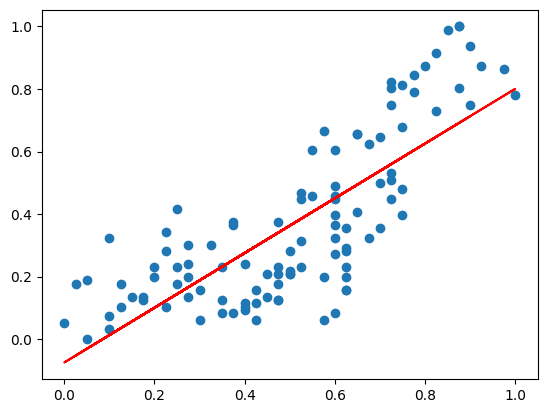

In [ ]:
# 그림으로 확인해 보고 싶어요!
# 독립변수 1개이기 때문에 데이터를 scatter를 이용해서 표현할 수 있고
# 우리 모델은 1차 직선 그래프이기 때문에 선 그래프로 표현할 수 있어요!

plt.scatter(x_data, t_data)

# 앗..그러면..우리 모델의 W와 b값을 알아야 직선의 그래프를
# 그릴 수 있겠네요.   ( y = Wx + b )
# 자 우리의 output layer를 통해서 W와 b값을 알아낼 수 있어요!
weights, bias = output_layer.get_weights()
plt.plot(x_data, x_data*weights + bias, color='r')

plt.show()

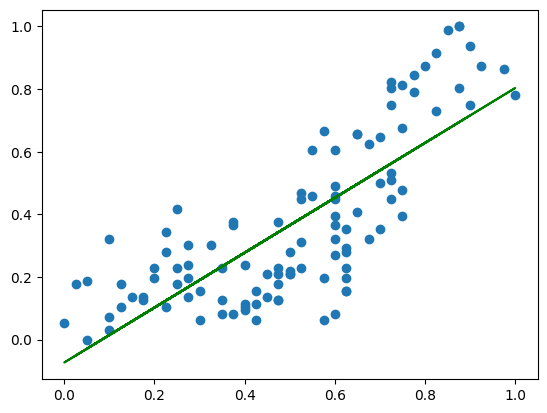

In [ ]:
# 위에서 구한 우리의 모델이 잘 만든 모델인지 확인하기 위해
# sklearn으로 모델을 구하고 그래프로 표현해 볼꺼예요!
from sklearn import linear_model

# model 생성, 학습
sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data, t_data)

# 결과를 그래프로 그려보아요!
plt.scatter(x_data, t_data)
# W와 b를 이용해서 직선의 그래프(우리 모델)을 그려보아요!

coef_ = sklearn_model.coef_   # sklearn_model.coef_ : 모델의 weights값
intercept_ = sklearn_model.intercept_  # 모델의 bias값.

plt.plot(x_data, x_data * coef_ + intercept_, color='g')

plt.show()


In [ ]:
my_data = np.array([[62]])
my_data_norm = scaler_x.transform(my_data)

# 이렇게 예측할때도 정규화된 데이터를 넣어서 예측을 수행해야 해요!
result = sklearn_model.predict(my_data_norm)

# 그러면 결과는 당연히 실제 Ozone값이 나오는게 아니라..정규화된 Ozone값이
# 출력되게 되요!
real_result = scaler_t.inverse_transform(result)

print(real_result)   # [[4.317596]]  - tensorflow keras의 결과
#                      [[4.51299041]] - sklearn의 결과

[[4.51299041]]


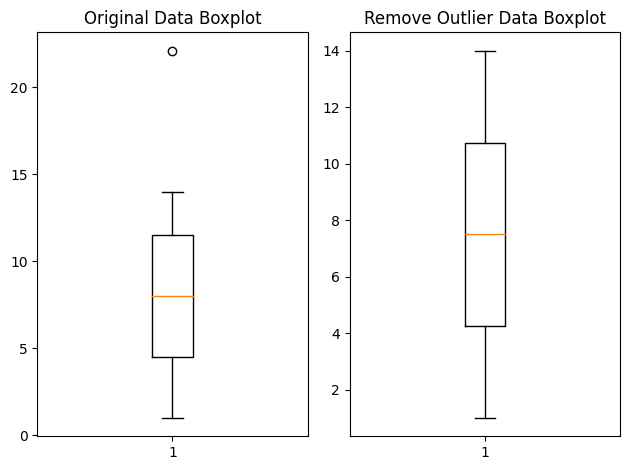

In [ ]:
# 이상치에 대해서 알아보아요!
# 먼저 이상치를 그래프로 살펴보기 위해 Boxplot을 이용해 보아요!

import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14, 22.1])

# 데이터를 이용해서 사분위 값을 알아보아요!
# print(np.median(data))  # 8.0  2사분위, 중위값
# print(np.percentile(data,25)) # 25%의 값, 1사분위값 => 4.5
# print(np.percentile(data,75)) # 75%의 값, 3사분위값 => 11.5
# print(np.percentile(data,100)) # 100%의 값, 4사분위값 => 22.1

iqr_value = np.percentile(data,75) - np.percentile(data,25)
# print(iqr_value)  # 7.0

upper_fence = np.percentile(data,75) + (iqr_value * 1.5)
# print(upper_fence)  # 22.0
lower_fence = np.percentile(data,25) - (iqr_value * 1.5)
# print(lower_fence)  # -6.0

# 그럼 내가 가진 데이터에서 이상치를 찾아서 제거하고 남은 정상적인
# 데이터를 추출해 보아요!
result_data = data[(data <= upper_fence) & (data >= lower_fence)]

# 그래프를 그려보아요!
fig = plt.figure()  # 도화지를 준비해요!

fig_1 = fig.add_subplot(1,2,1)  # 1행 2열의 첫번째 위치에 subplot을 배치
fig_2 = fig.add_subplot(1,2,2)  # 1행 2열의 두번째 위치에 subplot을 배치

fig_1.set_title('Original Data Boxplot')
fig_1.boxplot(data)

fig_2.set_title('Remove Outlier Data Boxplot')
fig_2.boxplot(result_data)

fig.tight_layout()

plt.show()

In [ ]:
# 이번에는 z-score를 이용해서 이상치 처리를 해 보아요!
import numpy as np
from scipy import stats

data = np.array([3,30,35,40,45,48,49,50,51,52,53,55,60,65,90,95])

zscore_threshold = 1.8 # 2.0이 많이 사용되요!

outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]
# [3, 90, 95]

# 이상치를 제거한 결과는
data[np.isin(data, outlier, invert=True)]


array([30, 35, 40, 45, 48, 49, 50, 51, 52, 53, 55, 60, 65])

In [ ]:
# 이상치까지 처리했음에도 불구하고
# 우리 tensorflow keras 구현으로 만든 model이
# 적절하게 만들어지지 않은거 같아요!!!!!

# 왜왜왜왜~~~ 그럴까요?
